## STFT_1

In [ ]:
# @author: Bj

In [1]:
from numpy import *
import scipy,pylab

In [2]:
#save('stft_sig',s,dt)
s = load('stft_sig.npy');dt = load('dt.npy')
s = s.T;   s = s[0];s = s[250:350];   
n = len(s)
t = dt*linspace(0,n-1,n)
f = linspace(0,1/(2*dt),n//2)
fn = 1/(2*dt)
df = f[4]-f[3]
sd_max = max(t)/2/pi/df
sd_min = dt**2/pi
def AB_STF(s,dt,sd):
    n = len(s)
    t = dt*linspace(0,n-1,n)
    TF = []
    for i in range(n):
        if shape(sd)==():
            sdd = sd
        else:
            sdd = sd[i]
        w = 1/(sqrt(2*pi)*sdd) * exp(-1/2*((t-t[i])/sdd)**2)
        TF.append(scipy.fft(s*w))
    ATF = absolute(TF)
    ATF = ATF[:,n//2:]
    return  ATF

sdl = arange(sd_min,sd_max,sd_max/20)
CF = []
for sd in sdl:
    ATF = AB_STF(s,dt,sd)
    CF.append(sum(log(ATF+0.001))) 
sd_opt = sdl[CF.index(min(CF))]
TT = AB_STF(s,dt,0.006) #0.002*ones([n,1])
#TT = array(TT).transpose() # axis r wrong - esp==>for instantaneous

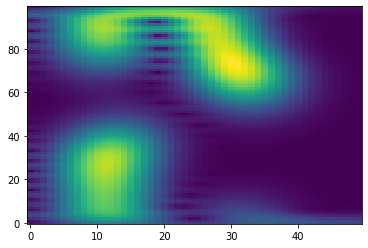

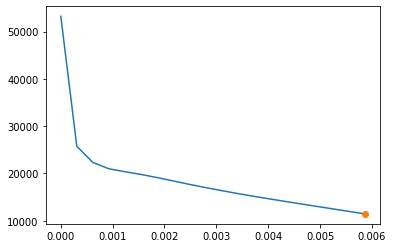

In [9]:
pylab.figure()
pylab.imshow(TT, origin='lower', aspect='auto',
             interpolation='nearest')
pylab.figure()
pylab.plot(sdl,CF,sd_opt,min(CF),'o')
#pylab.figure()
#pylab.subplot(133)
#pylab.plot(f,abs(scipy.fft(s))[n//2:])
#pylab.figure()
#pylab.subplot(121)
#pylab.imshow(W, origin='lower', aspect='auto',interpolation='nearest')
#pylab.subplot(122)
#pylab.plot(SW)
pylab.show()
# sd=1/2pi/f'_ins ==> max_sd = t_max/2pi/df & min_sd = dt/2pi/fn
#sd_opt,sd_max,sd_min,mean([sd_max,sd_min])

In [2]:
print(dt) 

NameError: name 'dt' is not defined